# Your info

Full name: Melika Ahmadi Ranjbar

Student ID: 97521036

Notice: **You can add new cells for each part.**

# Q1.A. Kohonen

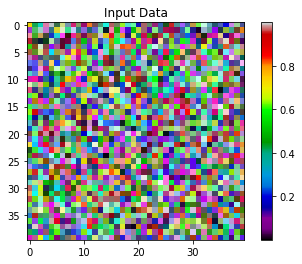

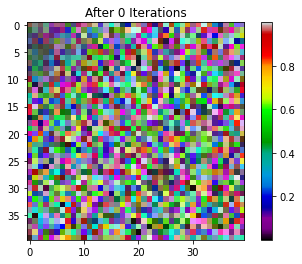

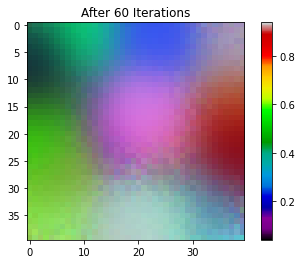

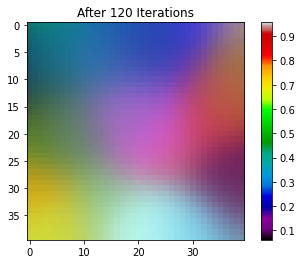

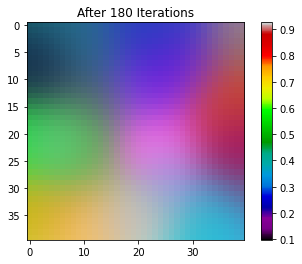

In [ ]:
#write your code here
#write your code here
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math 

# =========== Scopes =========== #

# Output Space
OutputX, OutputY = 40, 40

# Size
Size = OutputX * OutputY

# =========== Generating Data =========== #

Colors = np.random.rand(Size, 3)

# =========== Initialize Weights =========== #

def Initialize():

    Weights = np.random.ranf((OutputX, OutputY, Colors.shape[1]))
    return Weights

# =========== Find Best Match =========== #
# =========== Competition =========== #

def Winner(Weights):
    SelectedInput = Colors[np.random.choice(Colors.shape[0], size = 1, replace = False)]
    Distances = []

    
    # For All Neurons
    for x in range(OutputX):
        for y in range(OutputY):

            # Calculate Distance Then Select Best
            Distances.append(np.linalg.norm(SelectedInput - Weights[x][y]))

    Minimum = np.min(Distances)

    Map = np.array(Distances).reshape(OutputX, OutputY)
    MinimunArg = np.unravel_index(Map.argmin(), Map.shape)
    
    return Minimum, MinimunArg, Map, SelectedInput

# =========== Cooperation =========== #

def ComputeNeighborhood(MinDistance, Radius):

    PowerOfTwoRadius = 2 * np.pi * pow(Radius, 2)
    
    NeighborX = np.exp(-1 * np.square(np.arange(OutputX) - MinDistance[0]) / PowerOfTwoRadius)
    NeighborY = np.exp(-1 * np.square(np.arange(OutputY) - MinDistance[1]) / PowerOfTwoRadius)

    Neighborhood = np.outer(NeighborX, NeighborY)

    return Neighborhood

# =========== Adaption =========== #
# =========== Updadting Weights =========== #

def UpdateWeights(Weights, LearningRate, Win, Radius, SelectedInput):

    # Neighborhood
    Neighborhood = ComputeNeighborhood(Win, Radius)
    
    iteration = np.nditer(Neighborhood, flags = ['multi_index'])

    # Update Each Neuron
    while not iteration.finished:
        Weights[iteration.multi_index] = Weights[iteration.multi_index] + LearningRate * Neighborhood[iteration.multi_index] * (SelectedInput - Weights[iteration.multi_index])
        iteration.iternext()

# =========== Training =========== #

def Trainging(Iterations, Weights, LearningRate, Radius, Plot):
    for i in range(Iterations):
        Win, WinArg, Map, SelectedInput = Winner(Weights)
        UpdateWeights(Weights, LearningRate, WinArg, Radius, SelectedInput)
        if i % Plot == 0:
            plt.title('After ' + str(i) + ' Iterations')
            plt.imshow(Weights, cmap = "nipy_spectral")
            plt.colorbar()
            plt.show()

# =========== Scopes =========== #

# Radius
Radius = 3

# Learning Rate
LearningRate = 0.6

# Plot
Plot = 60

# Activation Map, Neurons Actually
Map = np.zeros((OutputX, OutputY))

# =========== Train Data =========== #

plt.title('Input Data')
plt.imshow(Colors.reshape(OutputX, OutputY, 3), cmap = "nipy_spectral")
plt.colorbar()
plt.show()

Trainging(200, Initialize(), LearningRate, Radius, Plot)







# Q1.B. Kohonen

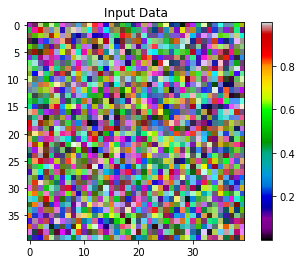

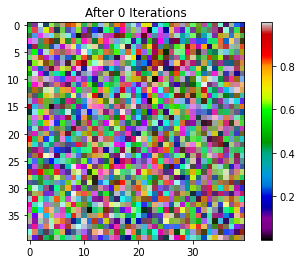

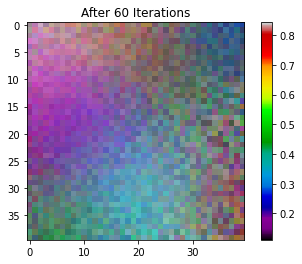

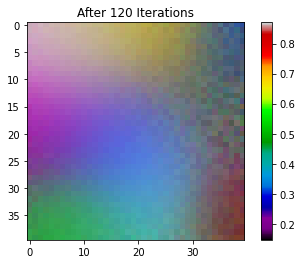

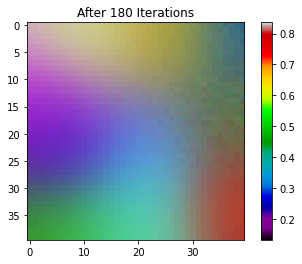

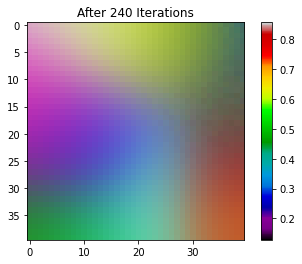

In [ ]:
#write your code here

# Previous Question Except For The Learning Rate
# Now Learning Rate Is Dynamic

#write your code here
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math 

# =========== Scopes =========== #

# Output Space
OutputX, OutputY = 40, 40

# Size
Size = OutputX * OutputY

# =========== Generating Data =========== #

Colors = np.random.rand(Size, 3)

# =========== Initialize Weights =========== #

def Initialize():

    Weights = np.random.ranf((OutputX, OutputY, Colors.shape[1]))
    return Weights

# =========== Find Best Match =========== #
# =========== Competition =========== #

def Winner(Weights):
    SelectedInput = Colors[np.random.choice(Colors.shape[0], size = 1, replace = False)]
    Distances = []

    
    # For All Neurons
    for x in range(OutputX):
        for y in range(OutputY):

            # Calculate Distance Then Select Best
            Distances.append(np.linalg.norm(SelectedInput - Weights[x][y]))

    Minimum = np.min(Distances)

    Map = np.array(Distances).reshape(OutputX, OutputY)
    # MinimunArg = np.unravel_index(np.argmin(Map, axis = None), Map.shape)
    MinimunArg = np.unravel_index(Map.argmin(), Map.shape)
    
    return Minimum, MinimunArg, Map, SelectedInput

# =========== Cooperation =========== #

def ComputeNeighborhood(MinDistance, Radius):

    PowerOfTwoRadius = 2 * np.pi * pow(Radius, 2)
    
    NeighborX = np.exp(-1 * np.square(np.arange(OutputX) - MinDistance[0]) / PowerOfTwoRadius)
    NeighborY = np.exp(-1 * np.square(np.arange(OutputY) - MinDistance[1]) / PowerOfTwoRadius)

    Neighborhood = np.outer(NeighborX, NeighborY)

    return Neighborhood

# =========== Adaption =========== #
# =========== Updadting Weights =========== #

def UpdateWeights(Iterations, Weights, LearningRate, Win, Radius, SelectedInput):

    LearningRateAfter, RadiusResult = Decay(Iterations, LearningRate, Radius)

    # Neighborhood
    Neighborhood = ComputeNeighborhood(Win, RadiusResult)
    
    iteration = np.nditer(Neighborhood, flags = ['multi_index'])

    # Update Each Neuron
    while not iteration.finished:
        Weights[iteration.multi_index] = Weights[iteration.multi_index] + LearningRateAfter * Neighborhood[iteration.multi_index] * (SelectedInput - Weights[iteration.multi_index])
        iteration.iternext()

# =========== Training =========== #

def Trainging(Iterations, Weights, LearningRate, Radius, Plot):
    for i in range(Iterations):
        Win, WinArg, Map, SelectedInput = Winner(Weights)
        UpdateWeights(Iterations, Weights, LearningRate, WinArg, Radius, SelectedInput)
        if i % Plot == 0:
            plt.title('After ' + str(i) + ' Iterations')
            plt.imshow(Weights, cmap = "nipy_spectral")
            plt.colorbar()
            plt.show()

# =========== Learning Rate Decay =========== #

def Decay(Iteration, LearningRate, Radius):

    DecayParameter = Iteration / 2 
    LearningRate = LearningRate/(1 + Iteration / DecayParameter)
    # Radius = Radius / (1 + Iteration / DecayParameter)
    
    return LearningRate, Radius

# =========== Scopes =========== #

# Radius
Radius = 4

# Learning Rate
LearningRate = 0.6

# Plot
Plot = 60

# Activation Map, Neurons Actually
Map = np.zeros((OutputX, OutputY))

# =========== Train Data =========== #

plt.title('Input Data')
plt.imshow(Colors.reshape(40, 40, 3), cmap = "nipy_spectral")
plt.colorbar()
plt.show()

Trainging(300, Initialize(), LearningRate, Radius, Plot)




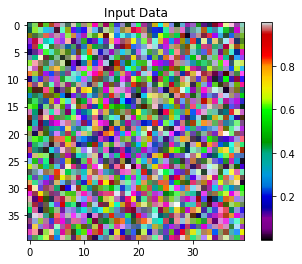

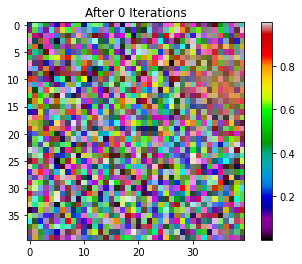

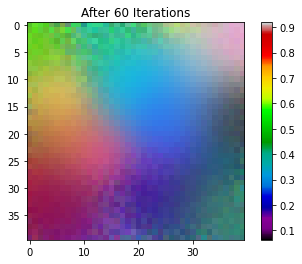

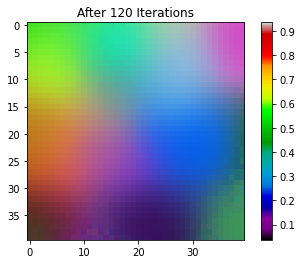

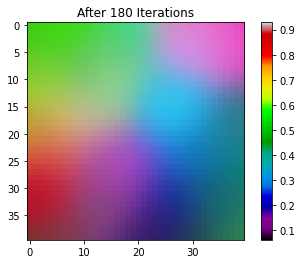

In [ ]:
#write your code here

# Previous Question Except For The Learning Rate
# Now Radius Is Dynamic

#write your code here
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math 

# =========== Scopes =========== #

# Output Space
OutputX, OutputY = 40, 40

# Size
Size = OutputX * OutputY

# =========== Generating Data =========== #

Colors = np.random.rand(Size, 3)

# =========== Initialize Weights =========== #

def Initialize():

    Weights = np.random.ranf((OutputX, OutputY, Colors.shape[1]))
    return Weights

# =========== Find Best Match =========== #
# =========== Competition =========== #

def Winner(Weights):
    SelectedInput = Colors[np.random.choice(Colors.shape[0], size = 1, replace = False)]
    Distances = []

    
    # For All Neurons
    for x in range(OutputX):
        for y in range(OutputY):

            # Calculate Distance Then Select Best
            Distances.append(np.linalg.norm(SelectedInput - Weights[x][y]))

    Minimum = np.min(Distances)

    Map = np.array(Distances).reshape(OutputX, OutputY)
    # MinimunArg = np.unravel_index(np.argmin(Map, axis = None), Map.shape)
    MinimunArg = np.unravel_index(Map.argmin(), Map.shape)
    
    return Minimum, MinimunArg, Map, SelectedInput

# =========== Cooperation =========== #

def ComputeNeighborhood(MinDistance, Radius):

    PowerOfTwoRadius = 2 * np.pi * pow(Radius, 2)
    
    NeighborX = np.exp(-1 * np.square(np.arange(OutputX) - MinDistance[0]) / PowerOfTwoRadius)
    NeighborY = np.exp(-1 * np.square(np.arange(OutputY) - MinDistance[1]) / PowerOfTwoRadius)

    Neighborhood = np.outer(NeighborX, NeighborY)

    return Neighborhood

# =========== Adaption =========== #
# =========== Updadting Weights =========== #

def UpdateWeights(Iterations, Weights, LearningRate, Win, Radius, SelectedInput):

    LearningRateAfter, RadiusResult = Decay(Iterations, LearningRate, Radius)

    # Neighborhood
    Neighborhood = ComputeNeighborhood(Win, RadiusResult)
    
    iteration = np.nditer(Neighborhood, flags = ['multi_index'])

    # Update Each Neuron
    while not iteration.finished:
        Weights[iteration.multi_index] = Weights[iteration.multi_index] + LearningRateAfter * Neighborhood[iteration.multi_index] * (SelectedInput - Weights[iteration.multi_index])
        iteration.iternext()

# =========== Training =========== #

def Trainging(Iterations, Weights, LearningRate, Radius, Plot):
    for i in range(Iterations):
        Win, WinArg, Map, SelectedInput = Winner(Weights)
        UpdateWeights(Iterations, Weights, LearningRate, WinArg, Radius, SelectedInput)
        if i % Plot == 0:
            plt.title('After ' + str(i) + ' Iterations')
            plt.imshow(Weights, cmap = "nipy_spectral")
            plt.colorbar()
            plt.show()

# =========== Learning Rate Decay =========== #

def Decay(Iteration, LearningRate, Radius):

    DecayParameter = Iteration / 2 
    # LearningRate = LearningRate/(1 + Iteration / DecayParameter)
    Radius = Radius / (1 + Iteration / DecayParameter)
    
    return LearningRate, Radius

# =========== Scopes =========== #

# Radius
Radius = 8

# Learning Rate
LearningRate = 0.6

# Plot
Plot = 60

# Activation Map, Neurons Actually
Map = np.zeros((OutputX, OutputY))

# =========== Train Data =========== #

plt.title('Input Data')
plt.imshow(Colors.reshape(40, 40, 3), cmap = "nipy_spectral")
plt.colorbar()
plt.show()

Trainging(300, Initialize(), LearningRate, Radius, Plot)




# Q2.A. MLP

In [ ]:
#write your code here
# We Use Keras Library in This Question

from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# =========== Keras Model =========== #

Model = Sequential()
Model.add(Dense(40, input_shape=(1,), activation = 'sigmoid'))
Model.add(Dense(20, input_shape=(1,), activation = 'sigmoid'))
Model.add(Dense(1))

# =========== Complie & Run =========== #

# Model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["acc"])
Model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mean_squared_error'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 921
Trainable params: 921
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
75/75 [==============================] - 0s 632us/step - loss: 0.5334 - mean_squared_error: 0.5334
Epoch 2/1000
75/75 [==============================] - 0s 965us/step - loss: 0.4715 - mean_squared_error: 0.4715
Epoch 3/1000
75/75 [==============================] - 0s 644us/step - loss: 0.4432 - mean_squared_error: 0.4432
Epoch 4/1000
75/75 [===========================

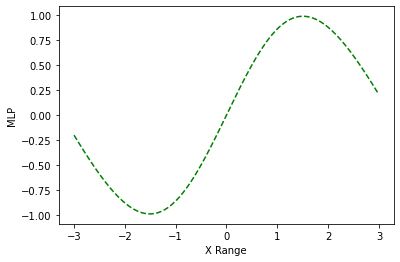

In [ ]:
# Run part

# =========== Data =========== #

x = np.arange(-300, 300).reshape(-1,1) / 100
y = np.sin(x)

# x_test, y_test = 
# validation_data = (x_test, y_test)

# =========== Summary =========== #

print(Model.summary())

for i in range(2):
    Model.fit(x, y, epochs = 1000, batch_size = 8)
Preds = Model.predict(x)

# =========== Accuracy & Error Ploting =========== #

plt.plot(x, Preds, 'g--')
plt.ylabel('MLP')
plt.xlabel('X Range')
plt.show()
 


# Q2.B.RBF

In [ ]:
#write your code here

# =========== Utils =========== #

def Gaussian(Input, Mean, Deviation):
    return np.exp(-1 * pow(Input - Mean, 2) / (2 * pow(Deviation, 2)))

def KClustering(X, k):
    # Randomly Select Initial Clusters From Input Data
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False

    while not converged:
        
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))

        # Find The Cluster That's Closest To Each Point
        closestCluster = np.argmin(distances, axis=1)

        # Update Clusters By Taking The Mean Of All Of The Points Assigned To That Cluster
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)

        # converge if clusters haven't moved
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()

    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)

    clustersWithNoPoints = []
    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            # keep track of clusters with no points or 1 point
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])

    # if there are clusters with 0 or 1 points, take the mean std of the other clusters
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))

    return clusters, stds

# =========== RBF Model =========== #

class RBF(object):

    def __init__(self, K = 2, LearningRate = 0.1, Epochs = 100, Function = Gaussian, InferDeviations = True):
        self.K = K
        self.LearningRate = LearningRate
        self.Function = Function
        self.Epochs = Epochs
        self.InferDeviations = InferDeviations

        # We Only Have One OUtput Neuron
        # So Need One Bias, And A 1D Vector For Weights
        self.Weights = np.random.randn(K)
        self.Bias = np.random.randn(1)

    def Fit(self, Input, Y):

        if self.InferDeviations == True:
            self.Centers, self.Deviations = KClustering(Input, self.K)
        else:
            # Use A Fixed Deviation
            self.Centers, _ = KClustering(Input, self.K)
            MaxD = max([np.abs(c1 - c2) for c1 in self.Centers for c2 in self.Centers])
            self.Deviations = np.repeat(MaxD / np.sqrt(2 * self.K), self.K)

        for e in range(self.Epochs):

            # We Do This For Each Input
            for x in range(Input.shape[0]):

                #For All Of The Radial Basis Functions
                EachInputResult = np.array([self.Function(Input[x], Center, Deviation) for Center, Deviation in zip(self.Centers, self.Deviations)])
                Result = np.dot(EachInputResult.T, self.Weights) + self.Bias

                # Calculate Error
                Error = Y[x] - Result

                # Update
                self.Weights = self.Weights + self.LearningRate * Error * EachInputResult
                self.Bias = self.Bias + self.LearningRate * Error


    def Predict(self, Input):
        Predicted = []
        for x in range(Input.shape[0]):

            #For All Of The Radial Basis Functions
            EachInputResult = np.array([self.Function(Input[x], Center, Deviation) for Center, Deviation in zip(self.Centers, self.Deviations)])
            Result = np.dot(EachInputResult.T, self.Weights) + self.Bias
            Predicted.append(Result)
        return Predicted


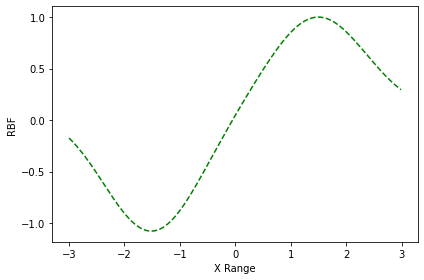

In [ ]:
# =========== Train Data =========== #

X = np.arange(-300, 300) / 100
# noise = np.arange(-300, 300).reshape(-1,1) / 100
y = np.sin(X)

RBFModel = RBF(LearningRate = 0.001, K = 2)
RBFModel.Fit(X, y)

# =========== Test And Show =========== #

YPredicted = RBFModel.Predict(X)
 
plt.ylabel('RBF')
plt.xlabel('X Range')
plt.plot(X, YPredicted, 'g--')
 
plt.tight_layout()
plt.show()

# Q2.C. Compare

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 40)                80        
_________________________________________________________________
dense_37 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 21        
Total params: 921
Trainable params: 921
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
100/100 [==============================] - 0s 684us/step - loss: 0.4459 - mean_squared_error: 0.4459
Epoch 2/1000
100/100 [==============================] - 0s 671us/step - loss: 0.4295 - mean_squared_error: 0.4295
Epoch 3/1000
100/100 [==============================] - 0s 695us/step - loss: 0.4002 - mean_squared_error: 0.4002
Epoch 4/1000
100/100 [================

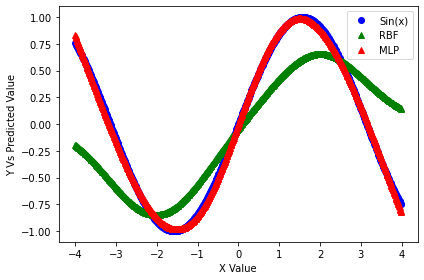

In [ ]:
#write your code here

# Use both of the codes above and plot all of them together
# RBF, MLP with the real function for f(x) = sin(x)
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# ~~~~~~~~~~~~~~~~~ MLP ~~~~~~~~~~~~~~~~~~~~~ #

# =========== Keras Model =========== #

Model = Sequential()
Model.add(Dense(40, input_shape=(1,), activation = 'sigmoid'))
Model.add(Dense(20, input_shape=(1,), activation = 'sigmoid'))
Model.add(Dense(1))

# =========== Complie & Run =========== #

# Model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["acc"])
Model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mean_squared_error'])

# ~~~~~~~~~~~~~~~~~ MLP ~~~~~~~~~~~~~~~~~~~~~ #

# ~~~~~~~~~~~~~~~~~ RBF ~~~~~~~~~~~~~~~~~~~~~ #

# =========== Utils =========== #

def Gaussian(Input, Mean, Deviation):
    return np.exp(-1 * pow(Input - Mean, 2) / (2 * pow(Deviation, 2)))

def KClustering(X, k):
    # Randomly Select Initial Clusters From Input Data
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    stds = np.zeros(k)
    converged = False

    while not converged:
        
        distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))

        # Find The Cluster That's Closest To Each Point
        closestCluster = np.argmin(distances, axis=1)

        # Update Clusters By Taking The Mean Of All Of The Points Assigned To That Cluster
        for i in range(k):
            pointsForCluster = X[closestCluster == i]
            if len(pointsForCluster) > 0:
                clusters[i] = np.mean(pointsForCluster, axis=0)

        # converge if clusters haven't moved
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()

    distances = np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :]))
    closestCluster = np.argmin(distances, axis=1)

    clustersWithNoPoints = []
    for i in range(k):
        pointsForCluster = X[closestCluster == i]
        if len(pointsForCluster) < 2:
            # keep track of clusters with no points or 1 point
            clustersWithNoPoints.append(i)
            continue
        else:
            stds[i] = np.std(X[closestCluster == i])

    # if there are clusters with 0 or 1 points, take the mean std of the other clusters
    if len(clustersWithNoPoints) > 0:
        pointsToAverage = []
        for i in range(k):
            if i not in clustersWithNoPoints:
                pointsToAverage.append(X[closestCluster == i])
        pointsToAverage = np.concatenate(pointsToAverage).ravel()
        stds[clustersWithNoPoints] = np.mean(np.std(pointsToAverage))

    return clusters, stds

# =========== RBF Model =========== #

class RBF(object):

    def __init__(self, K = 2, LearningRate = 0.1, Epochs = 100, Function = Gaussian, InferDeviations = True):
        self.K = K
        self.LearningRate = LearningRate
        self.Function = Function
        self.Epochs = Epochs
        self.InferDeviations = InferDeviations

        # We Only Have One OUtput Neuron
        # So Need One Bias, And A 1D Vector For Weights
        self.Weights = np.random.randn(K)
        self.Bias = np.random.randn(1)

    def Fit(self, Input, Y):

        if self.InferDeviations == True:
            self.Centers, self.Deviations = KClustering(Input, self.K)
        else:
            # Use A Fixed Deviation
            self.Centers, _ = KClustering(Input, self.K)
            MaxD = max([np.abs(c1 - c2) for c1 in self.Centers for c2 in self.Centers])
            self.Deviations = np.repeat(MaxD / np.sqrt(2 * self.K), self.K)

        for e in range(self.Epochs):

            # We Do This For Each Input
            for x in range(Input.shape[0]):

                #For All Of The Radial Basis Functions
                EachInputResult = np.array([self.Function(Input[x], Center, Deviation) for Center, Deviation in zip(self.Centers, self.Deviations)])
                Result = np.dot(EachInputResult.T, self.Weights) + self.Bias

                # Calculate Error
                Error = Y[x] - Result

                # Update
                self.Weights = self.Weights + self.LearningRate * Error * EachInputResult
                self.Bias = self.Bias + self.LearningRate * Error


    def Predict(self, Input):
        Predicted = []
        for x in range(Input.shape[0]):

            #For All Of The Radial Basis Functions
            EachInputResult = np.array([self.Function(Input[x], Center, Deviation) for Center, Deviation in zip(self.Centers, self.Deviations)])
            Result = np.dot(EachInputResult.T, self.Weights) + self.Bias
            Predicted.append(Result)
        return Predicted

# ~~~~~~~~~~~~~~~~~ RBF ~~~~~~~~~~~~~~~~~~~~~ #


# =========== Train Data RBF =========== #


x = np.arange(-400, 400) / 100
y = np.sin(x)

RBFModel = RBF(LearningRate = 0.001, K = 2)
RBFModel.Fit(x, y)

# =========== Summary MLP =========== #

print(Model.summary())
Model.fit(x, y, epochs = 1000, batch_size = 8)

# =========== Test And Show =========== #

YPredictedRBF = RBFModel.Predict(x)
PredsMLP = Model.predict(x)
 

plt.ylabel('Y Vs Predicted Value')
plt.xlabel('X Value')

plt.plot(x, y, 'bo', label = 'Sin(x)')
plt.plot(x, YPredictedRBF, 'g^', label = 'RBF')
plt.plot(x, PredsMLP, 'r^', label = 'MLP')

plt.legend()
 
plt.tight_layout()
plt.show()

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
   

  according to the question number.
  - There are 2 assignments in Gradescope: 

    You should upload your **codes** and your **notebook** in `HW2` section and your final report for all of the questions as a **single pdf** file in `HW2 - Report`. Autograder will automatically check for:
    - `CI992_HW2.ipynb`
    - `Q1.A. Kohonen.py`
    - `Q1.B. Koohonen.py`
    - `Q2.A. MLP.py`
    - `Q2.B. RBF.py`
    - `Q2.C. Compare.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.